In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml


import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Current cuda device is', device)

batch_size = 50
learning_rate = 0.0001
epoch_num = 15

# train_data = datasets.MNIST(root = '../data/mnist/',
#                             train=True,
#                             download=True,
#                             transform=transforms.ToTensor())
# test_data = datasets.MNIST(root = '../data/mnist/',
#                             train=False,
#                             download=True,
#                             transform=transforms.ToTensor())
# print('number of training data : ', len(train_data))
# print('number of test data : ', len(test_data))


# train = datasets.MNIST(root = '../data/mnist/',
#                             train=True,
#                             download=True,)

# test = datasets.MNIST(root = '../data/mnist/',
#                             train=False,
#                             download=True)

# x = train.data
# y = train.targets

# # train_data = train_data.reshape(-1, 28*28)
# x = x.numpy()
# y = y.numpy()
# x = x.reshape(-1, 28*28)
# x.shape, y.shape, type(x), type(y)

# ## normalize

# x = x/255.0



Current cuda device is cuda


In [5]:
import logging

import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn import cluster, decomposition
from sklearn.datasets import fetch_olivetti_faces

rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, targets = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)
faces.shape

Dataset consists of 400 faces


(400, 4096)

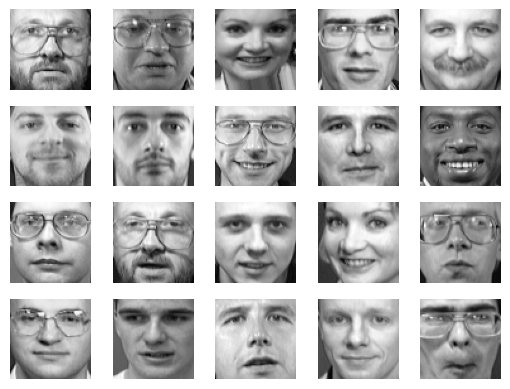

In [17]:
# show images 
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(faces[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

In [4]:

# making data frame 
import pandas as pd

feat_cols = ['pixel'+str(i) for i in range(faces_centered.shape[1]) ]

df = pd.DataFrame(faces_centered,columns=feat_cols)

In [7]:

df['label'] = targets
# df['label'] = df['label'].apply(lambda i: str(i))
x,y = None, None
print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (400, 4097)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,0.277660,0.210501,0.180852,0.175842,0.164271,0.179974,0.155542,0.166647,0.136947,0.141699,...,-0.135708,-0.135646,-0.231431,-0.240915,-0.239375,-0.232495,-0.226266,-0.222630,-0.227702,13
1,0.413311,0.366813,0.312371,0.270171,0.242071,0.204055,0.158962,0.099819,0.094913,0.116193,...,-0.260387,-0.165284,-0.062722,0.122009,0.239251,0.213073,0.206906,0.359303,0.387288,30
2,0.016765,-0.042129,-0.063514,-0.093317,-0.092491,-0.105714,-0.113617,-0.048793,0.016548,0.054358,...,0.318273,0.351393,0.342385,0.390753,0.421218,0.432230,0.430195,0.413170,0.284131,34
3,-0.159815,-0.115404,-0.111995,-0.112873,-0.045931,-0.050889,-0.054660,-0.035291,-0.040197,0.001745,...,0.439214,0.484730,0.211259,0.057148,0.310753,0.234988,0.175102,-0.093989,-0.206499,19
4,-0.059356,0.005716,0.062844,0.086760,0.071057,0.074363,0.066460,0.065168,0.072658,0.069146,...,-0.055369,-0.042910,-0.035389,-0.082063,-0.187962,-0.065379,0.023495,0.014735,0.071646,24


In [87]:
# PCA
df1 = df[:1000]
y_viz_train = df1['label']
X_viz_train = df1.drop('label', axis=1)
# X_viz_test = test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_viz_train = scaler.fit_transform(X_viz_train)
# X_viz_test = scaler.fit_transform(X_viz_test)

pca = PCA(n_components=77)
pca_s = pca.fit_transform(X_viz_train)
# principalDf =pd.DataFrame(data = pca_s, columns = ['principal_axes_1',  'principal_axes_2', 'principal_axes_3','principal')
cols = []
for i in range(1,78):
    columns = 'principal_axes_'+str(i)
    cols.append(columns)
    
principalDf = pd.DataFrame(data= pca_s,columns=cols)
label = pd.DataFrame(list(df1['label']))


principalDf = pd.concat([principalDf,label],axis = 1,join='inner', ignore_index=True)
principalDf = principalDf.loc[:,~principalDf.columns.duplicated()]
principalDf.columns = cols + ['label']
principalDf.head() 

,principal_axes_1,principal_axes_2,principal_axes_3,principal_axes_4,principal_axes_5,principal_axes_6,principal_axes_7,principal_axes_8,principal_axes_9,principal_axes_10,...,principal_axes_69,principal_axes_70,principal_axes_71,principal_axes_72,principal_axes_73,principal_axes_74,principal_axes_75,principal_axes_76,principal_axes_77,label
0,-34.597702,17.823055,1.421118,-10.844221,4.290980,-15.289907,-7.345652,-13.993832,16.172041,7.458491,...,2.900587,-0.329721,2.949004,-1.488523,2.449102,1.327841,5.034964,0.434775,3.533186,13
1,-13.514546,-46.464031,-18.999750,26.268475,10.228374,-5.792556,-7.207891,-1.655104,-3.244775,13.110902,...,-2.499119,-6.797139,-3.401695,0.021745,2.865438,-0.969800,2.839957,-2.673010,-0.290940,30
2,-21.423540,0.885411,-1.093200,48.670033,-1.099483,-3.954703,11.506807,15.818356,1.370987,-21.966713,...,0.925694,-6.539428,-0.277567,-3.224041,1.854108,3.093889,-5.351316,-0.184655,-1.720801,34
3,28.540606,2.913472,7.522657,-15.876248,-14.819943,-23.239990,0.197619,27.281052,-17.114649,-11.111787,...,-1.679123,-0.454930,-3.925058,-2.287265,-0.745028,0.615029,-0.434176,4.694427,-1.379863,19
4,-9.371280,20.719538,-1.957111,10.032617,14.314394,4.943163,-4.353115,5.195696,10.126735,2.287722,...,-0.806262,-1.284840,-2.252611,-0.554126,1.557111,1.552352,-0.901897,-0.876111,2.174642,24


Eigen Vectors:
[[-0.01956147 -0.02104447 -0.02303712 ...  0.01451197  0.01241387
   0.01122704]
 [ 0.00112709  0.0002295   0.00090651 ... -0.00868348 -0.00790448
  -0.00706519]
 [-0.00113614 -0.00232927 -0.0082166  ...  0.00871746  0.00810268
   0.00738402]
 ...
 [ 0.02592925  0.01929122  0.00530294 ... -0.00739333  0.00111231
   0.00533992]
 [ 0.01063099  0.00057857 -0.00317032 ... -0.00938316 -0.00624143
   0.00903292]
 [ 0.03553076  0.03130697  0.02943983 ...  0.02002458  0.01379266
   0.01363863]]
(77, 4096)
Eigen Values:
[675.80426   459.0799    260.1428    213.93344   176.82579   142.11623
 124.76375   107.00836    91.96055    77.87587    76.305405   71.03487
  64.68806    61.95402    52.866898   47.37114    42.229694   41.525803
  40.324734   38.21693    36.83696    32.47053    30.843836   29.240616
  27.436298   26.83766    24.866018   22.709703   22.281296   21.787241
  21.081661   19.825323   18.154758   18.014503   17.408873   16.982433
  16.360542   15.643827   15.263666   

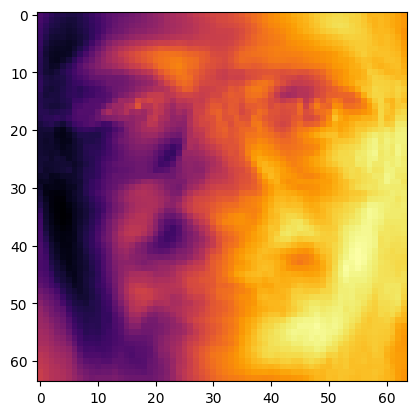

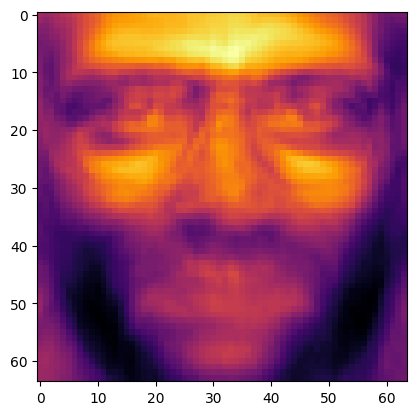

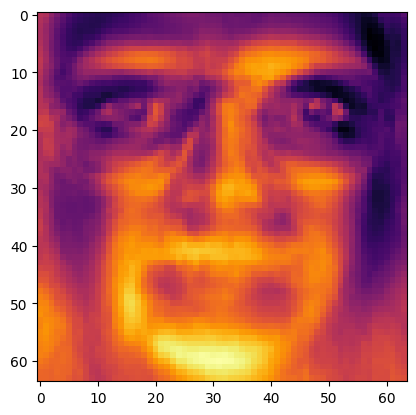

In [88]:
eigen_vectors = pca.components_
eigen_values = pca.explained_variance_

print("Eigen Vectors:")
print(eigen_vectors)
print(eigen_vectors.shape)
print("Eigen Values:")
print(eigen_values)

for i in range(3):
    egv1 = eigen_vectors[i].reshape(64,64)
    plt.imshow(egv1,cmap='inferno')#,cmap='impectral')
    plt.show()

In [20]:

egv1 = eigen_vectors[0]#.reshape(28,28)
egv2 = eigen_vectors[1]#.reshape(28,28)
egv3 = eigen_vectors[2]#.reshape(28,28)

a= egv1.T@egv2
b = egv1.T@egv3
c = egv2.T@egv3
a,b,c

egv1.T@egv1 # normalized

1.0

In [18]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = principalDf['principal_axes_1'].values
y = principalDf['principal_axes_2'].values
z = principalDf['principal_axes_3'].values
# change the label to int
principalDf['label'] = principalDf['label'].astype(int)

label = principalDf['label'].values

2023-07-04 00:40:09,816 INFO Animation.save using <class 'matplotlib.animation.PillowWriter'>


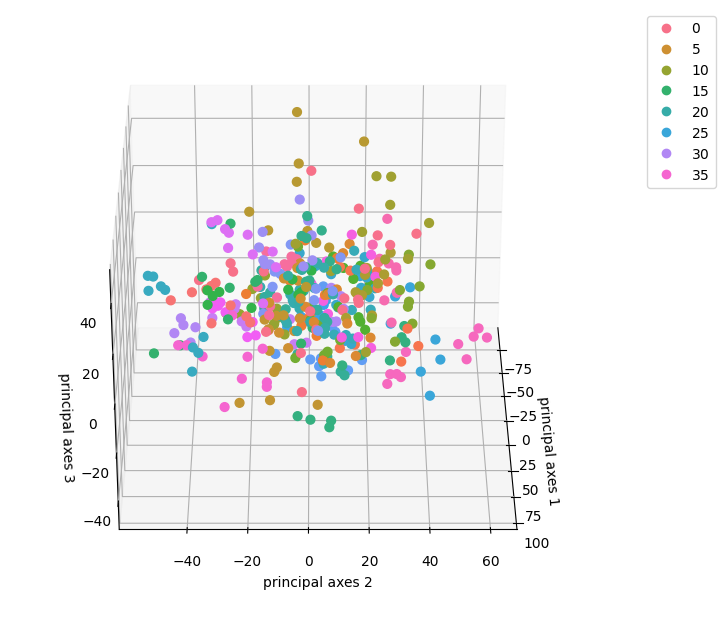

In [19]:
import re, seaborn as sns
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=label, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('principal axes 1')
ax.set_ylabel('principal axes 2')
ax.set_zlabel('principal axes 3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

from matplotlib import animation

def rotate(angle):
    ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=10)
ani.save('pca_faces.gif', writer=animation.PillowWriter(fps=60))

In [23]:
# !pip install seaborn matplotlib plotly

<Figure size 700x300 with 0 Axes>

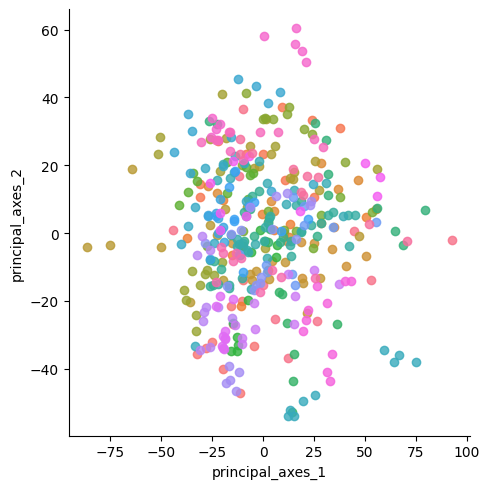

In [27]:
import seaborn as sns
flatui = ["#9b59b6", "#3498db", "orange"]
sns.set_palette(flatui)

# label showing

plt.figure(figsize=(7,3))
sns.lmplot( x="principal_axes_1", y="principal_axes_2", data=principalDf, fit_reg=False, hue='label', legend=False,)


In [90]:
new_images = []
for i in range(20):
    new_image = np.zeros((64*64))
    for j in range(77):
        new_image += eigen_vectors[j]*principalDf.iloc[i,j]
    new_images.append(new_image)

fig = plt.figure(figsize=(13,7))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1, title='people: ' + str(df.label[i]) )
    ax.imshow(new_images[i].reshape(64,64),cmap='gray')
    



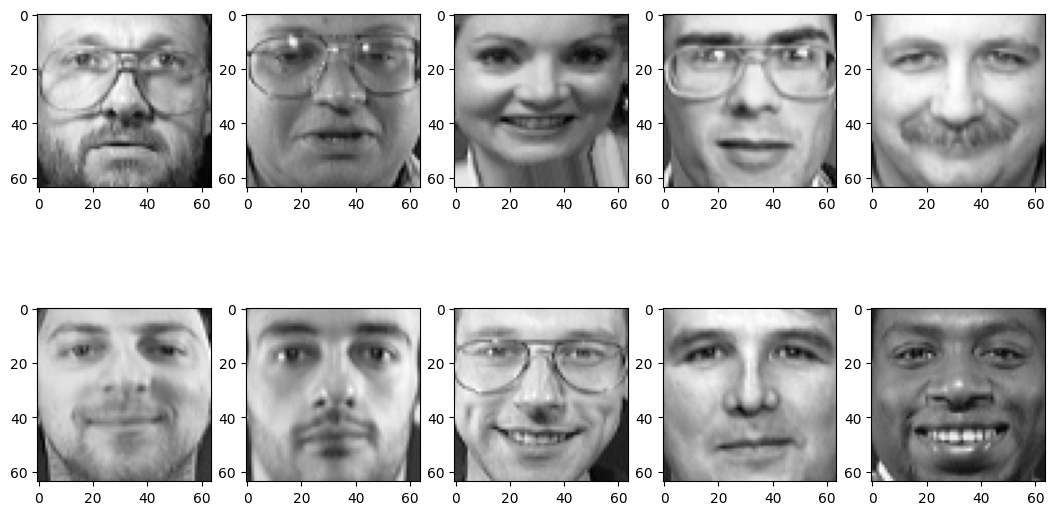

In [91]:

fig = plt.figure(figsize=(13,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(faces[i].reshape(64,64), cmap='gray')
    

In [39]:
new_images = new_images + faces.mean(axis=0)

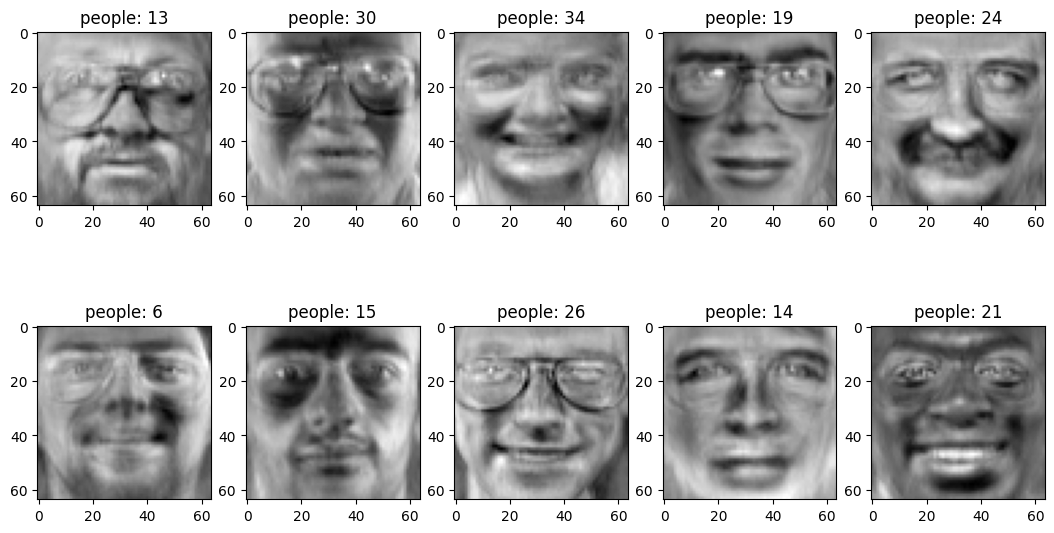

In [92]:

fig = plt.figure(figsize=(13,7))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1, title='people: ' + str(df.label[i]) )
    ax.imshow(new_images[i].reshape(64,64),cmap='gray')
    

